# Kaggle CareerCon 2019 Training Data EDA
Nam D. Nguyen

[CareerCon 2019 Competition Page](https://www.kaggle.com/c/career-con-2019)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import os

init_notebook_mode(connected=True)

## Explore X Training Data

In [2]:
train = pd.read_csv('../data/raw/X_train.csv')

In [3]:
train.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [4]:
train.shape

(487680, 13)

In [5]:
train.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000
mean,1904.500000,63.500000,-0.018050,0.075062,0.012458,-0.003804,0.000178,0.008338,-0.019184,0.129281,2.886468,-9.364886
std,1099.853353,36.949327,0.685696,0.708226,0.105972,0.104299,0.117764,0.088677,0.229153,1.870600,2.140067,2.845341
min,0.000000,0.000000,-0.989100,-0.989650,-0.162830,-0.156620,-2.371000,-0.927860,-1.268800,-36.067000,-121.490000,-75.386000
25%,952.000000,31.750000,-0.705120,-0.688980,-0.089466,-0.106060,-0.040752,-0.033191,-0.090743,-0.530833,1.957900,-10.193000
50%,1904.500000,63.500000,-0.105960,0.237855,0.031949,-0.018704,0.000084,0.005412,-0.005335,0.124980,2.879600,-9.365300
75%,2857.000000,95.250000,0.651803,0.809550,0.122870,0.097215,0.040527,0.048068,0.064604,0.792263,3.798800,-8.522700
max,3809.000000,127.000000,0.989100,0.988980,0.155710,0.154770,2.282200,1.079100,1.387300,36.797000,73.008000,65.839000


In [6]:
train.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 13 columns):
row_id                   487680 non-null object
series_id                487680 non-null int64
measurement_number       487680 non-null int64
orientation_X            487680 non-null float64
orientation_Y            487680 non-null float64
orientation_Z            487680 non-null float64
orientation_W            487680 non-null float64
angular_velocity_X       487680 non-null float64
angular_velocity_Y       487680 non-null float64
angular_velocity_Z       487680 non-null float64
linear_acceleration_X    487680 non-null float64
linear_acceleration_Y    487680 non-null float64
linear_acceleration_Z    487680 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 48.4+ MB


In [7]:
train.isnull().sum()

row_id                   0
series_id                0
measurement_number       0
orientation_X            0
orientation_Y            0
orientation_Z            0
orientation_W            0
angular_velocity_X       0
angular_velocity_Y       0
angular_velocity_Z       0
linear_acceleration_X    0
linear_acceleration_Y    0
linear_acceleration_Z    0
dtype: int64

There are no missing data from the X training set.

### Correlation Matrix for X Training Data

Next, look at the correlation between features, after removing ID features.

In [8]:
corr = train.iloc[:, 2:].corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
measurement_number,1,-0.000336,0.000604,0.000607,-0.000334,-0.000334,0.000963,0.00111,-0.00221,-0.00233,-0.0011
orientation_X,-0.000336,1,-0.186,-0.134,0.998,0.0015,0.047,-0.0585,-0.00255,-0.0096,-0.0021
orientation_Y,0.000604,-0.186,1,0.998,-0.226,0.000572,0.0211,-0.0257,-0.00388,0.012,0.0025
orientation_Z,0.000607,-0.134,0.998,1,-0.176,0.000456,0.0232,-0.0282,-0.00418,0.00976,0.00188
orientation_W,-0.000334,0.998,-0.226,-0.176,1,0.00153,0.0466,-0.0581,-0.00291,-0.00882,-0.00191
angular_velocity_X,-0.000334,0.0015,0.000572,0.000456,0.00153,1,-0.0862,-0.0162,-0.00257,-0.0194,-0.0347
angular_velocity_Y,0.000963,0.047,0.0211,0.0232,0.0466,-0.0862,1,-0.762,-0.0273,0.0155,0.00442
angular_velocity_Z,0.00111,-0.0585,-0.0257,-0.0282,-0.0581,-0.0162,-0.762,1,0.029,0.00055,-0.00122
linear_acceleration_X,-0.00221,-0.00255,-0.00388,-0.00418,-0.00291,-0.00257,-0.0273,0.029,1,0.0529,0.0165
linear_acceleration_Y,-0.00233,-0.0096,0.012,0.00976,-0.00882,-0.0194,0.0155,0.00055,0.0529,1,0.384


There is strong correlation between Y and Z orientations, X and W orientations, and Y and Z angular velocities.

## Explore Y Target Training Data

In [9]:
target = pd.read_csv('../data/raw/y_train.csv')

In [10]:
target.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [11]:
target.shape

(3810, 3)

In [12]:
target.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 3 columns):
series_id    3810 non-null int64
group_id     3810 non-null int64
surface      3810 non-null object
dtypes: int64(2), object(1)
memory usage: 89.4+ KB


In [13]:
target.isnull().sum()

series_id    0
group_id     0
surface      0
dtype: int64

No missing data from the Y target training set.

In [14]:
target.nunique()

series_id    3810
group_id       73
surface         9
dtype: int64

### Counts for Surface Types

In [15]:
surface_counts = target.groupby('surface').nunique()
surface_counts.iloc[:, 0:2]

,series_id,group_id
surface,,
carpet,189,4
concrete,779,15
fine_concrete,363,7
hard_tiles,21,1
hard_tiles_large_space,308,5
soft_pvc,732,14
soft_tiles,297,6
tiled,514,9
wood,607,12


There are some imbalance classes in the training dataset, particularly for "hard tiles," which only has one group, which itself only has 21 series.

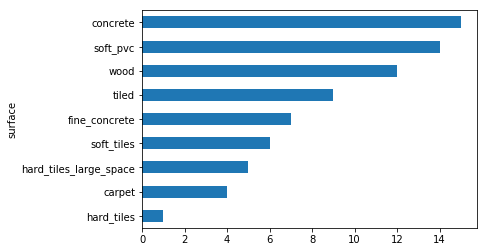

In [16]:
surface_counts.group_id.sort_values().plot(kind='barh')

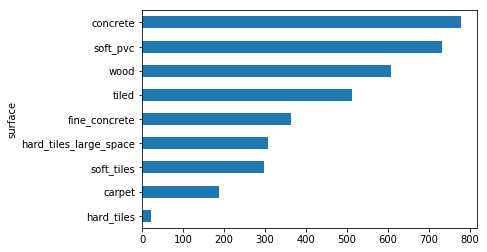

In [17]:
surface_counts.series_id.sort_values().plot(kind='barh')

### Proportion of Each Surface Type in Training Set

In [18]:
surface_counts.apply(lambda x: x/x.sum()).group_id.sort_values(ascending=False)

surface
concrete                  0.205479
soft_pvc                  0.191781
wood                      0.164384
tiled                     0.123288
fine_concrete             0.095890
soft_tiles                0.082192
hard_tiles_large_space    0.068493
carpet                    0.054795
hard_tiles                0.013699
Name: group_id, dtype: float64

The largest class (concrete) makes up 20.5% of all surface types groups, while the smallest (hard tiles) only accounts for 1.4% of all groups. There is a 1:15 ratio between the smallest and largest unique group count by surface type.

Cross-validation strategy should account for imbalanced classes. Given the fairly large size of the X training data set, undersampling the majority classes to balance out the minority classes might work. Should also try oversampling with SMOTE or bootstrapping the data.